# Principal Component Analysis with Cancer Data

In [279]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [280]:
bcancer = pd.read_csv("breast-cancer-wisconsin-data.csv")
bcancer.tail(5)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [218]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [281]:
print("The total rows and columns in breast cancer dataset is ", bcancer.shape)
bcancer.info()
bcancer.describe().transpose()

The total rows and columns in breast cancer dataset is  (699, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [282]:
# We could see "?" values in column, this should be removed from data set
print("The total NA values in columns is " , sum([True for idx,row in bcancer.iterrows() if any(row.isna())]))
# Check for missing value in any other column

The total NA values in columns is  0


In [283]:
# No missing values found. So let us try to remove ? from bare nuclei column
char2find = "?"

# Get count of rows having ?
#print(bcancer.str.find(char2find))
print(bcancer["Bare Nuclei"].value_counts())

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64


In [284]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

#bcancer["Bare Nuclei"].replace("?", np.NaN, inplace = True)

bcancer["Bare Nuclei"].replace("?", 1, inplace = True)

print(bcancer["Bare Nuclei"].value_counts())

1     402
10    132
2      30
5      30
3      28
8      21
4      19
1      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64


In [285]:
#bcancer["Bare Nuclei"] = bcancer["Bare Nuclei"].apply(pd.to_numeric)
#print(bcancer["Bare Nuclei"].mode())
#bcancer["Bare Nuclei"].replace(np.nan,bcancer["Bare Nuclei"].mode(), inplace = True)

print(bcancer["Bare Nuclei"].value_counts())
bcancer.info()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
1      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [286]:
# Check for correlation of variable

sns.pairplot(bcancer,diag_kind='kde', hue = "Class" , size = 10)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


TypeError: 1 is not a string

In [ ]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

import matplotlib.pyplot as mplot
import seaborn as sns

mplot.figure(figsize=(18 , 18))

bcancer_corr = bcancer.corr()
sns.heatmap(bcancer_corr, xticklabels = bcancer_corr.columns.values, yticklabels = bcancer_corr.columns.values, annot = True);


In [225]:
#Let us check for pair plots

In [226]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [227]:
# We could see most of the outliers are now removed.

In [ ]:
print(bcancer.duplicated().value_counts())


In [ ]:
bcancer.drop_duplicates(inplace = True)
print(bcancer.count())

In [ ]:
bcancer = bcancer.drop(["ID"], axis = 1)

In [ ]:
mplot.figure(figsize=(18 , 18))
bcancer.boxplot()

In [287]:
pd.crosstab(bcancer["Single Epithelial Cell Size"],bcancer["Class"])
#bcancer

Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,363,23
3,29,43
4,7,41
5,5,34
6,2,39
7,3,9
8,2,19
9,0,2


In [288]:
bcancer["Marginal Adhesion"] = np.where(bcancer["Marginal Adhesion"] > 8 , 4, bcancer["Marginal Adhesion"])

bcancer["Single Epithelial Cell Size"] = np.where(bcancer["Single Epithelial Cell Size"] > 7 , 4, bcancer["Single Epithelial Cell Size"])

bcancer["Normal Nucleoli"] = np.where(bcancer["Normal Nucleoli"] > 9 , 5, bcancer["Normal Nucleoli"])

bcancer["Bland Chromatin"] = np.where(bcancer["Bland Chromatin"] > 8 , 4, bcancer["Bland Chromatin"])

bcancer["Mitoses"] = np.where(bcancer["Mitoses"] > 1 , 1, bcancer["Mitoses"])



# Q6 Create a covariance matrix for identifying Principal components

In [289]:
# PCA
# Step 1 - Create covariance matrix
bcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [299]:
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import recall_score

#print(bcancer["Bare Nuclei"].value_counts())
print(bcancer.iloc[:,5].value_counts())

y = bcancer["Class"]
X = bcancer.drop('Class',axis=1)

print(X.info())
X["Bare Nuclei"].value_counts()
#print(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)

2    386
4    102
3     72
1     47
6     41
5     39
7     12
Name: Single Epithelial Cell Size, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
None


1     402
10    132
2      30
5      30
3      28
8      21
4      19
1      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [300]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#print(X_train)
X_train_std = sc.fit_transform(X)  # scale training and test data independently to prevent data leaks
#X_test_std = sc.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [301]:
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00143266 -0.05538768 -0.04166294 -0.04163563 -0.04978643 -0.06176131
  -0.09266525 -0.06617947 -0.07029395  0.        ]
 [-0.05538768  1.00143266  0.64583645  0.65552689  0.49147616  0.53729985
   0.5908535   0.56229461  0.51735367  0.        ]
 [-0.04166294  0.64583645  1.00143266  0.90818117  0.68637009  0.73765434
   0.68765657  0.7193287   0.65617015  0.        ]
 [-0.04163563  0.65552689  0.90818117  1.00143266  0.65424809  0.71479919
   0.70848734  0.70207017  0.63766582  0.        ]
 [-0.04978643  0.49147616  0.68637009  0.65424809  1.00143266  0.64343778
   0.64477106  0.65678658  0.58363679  0.        ]
 [-0.06176131  0.53729985  0.73765434  0.71479919  0.64343778  1.00143266
   0.62356323  0.62721623  0.62132618  0.        ]
 [-0.09266525  0.5908535   0.68765657  0.70848734  0.64477106  0.62356323
   1.00143266  0.68527344  0.58773705  0.        ]
 [-0.06617947  0.56229461  0.7193287   0.70207017  0.65678658  0.62721623
   0.68527344  1.00143266  0.

# Q7 Identify eigen values and eigen vector

In [238]:
# Step 2- Get eigen values and eigen vector

In [302]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-3.68771731e-02  9.96077296e-01  1.27208110e-03  8.55639342e-03
   6.13040952e-02  1.82513618e-03  1.74659267e-02 -4.82361228e-02
  -1.39968877e-03  0.00000000e+00]
 [ 3.16396687e-01  9.31454403e-03  8.17895537e-03 -8.12914990e-01
   1.75631841e-01 -5.77437113e-02  1.59517429e-01  9.72191220e-02
  -4.12104904e-01  0.00000000e+00]
 [ 3.87464769e-01  5.25404489e-02  7.22792707e-01 -6.95819731e-02
  -3.71945838e-01 -3.08295250e-02 -2.80038431e-01  2.13274038e-01
   2.37987610e-01  0.00000000e+00]
 [ 3.83644165e-01  5.09283239e-02 -6.82314119e-01 -1.44590235e-01
  -3.58358181e-01 -1.19821423e-03 -3.57226093e-01  1.21037369e-01
   3.05093460e-01  0.00000000e+00]
 [ 3.41560122e-01  2.17488500e-02 -5.44583267e-02  4.39234719e-01
   6.14848629e-02  3.66882538e-01 -2.15520271e-01  2.97118064e-01
  -6.43319133e-01  0.00000000e+00]
 [ 3.51669904e-01  1.32776877e-02 -3.53247543e-02  2.08754272e-01
  -5.12879483e-01 -2.10168694e-01  5.57269198e-01 -4.10405644e-01
  -2.12433052e-

# Q8 Find variance and cumulative variance by each eigen vector

In [303]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 61.62786747  72.71493446  78.78271423  83.7062194   88.31524441
  92.17323839  95.72024813  99.00628226 100.         100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [319]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance:",fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [1.00000000e+00 1.00610275e-10 1.15098125e-11]
[[ 1.00000000e+00 -2.52366403e-07 -2.05723172e-07 -2.00228984e-07
  -1.54241944e-07 -1.39973821e-07 -5.43103408e-07 -2.33671327e-07
  -2.20266804e-07 -0.00000000e+00]
 [ 7.24020483e-07  3.47092895e-01  4.52182601e-01  4.40562255e-01
   2.36158864e-01  1.75487025e-01  5.09271532e-01  2.87060451e-01
   2.29421917e-01  0.00000000e+00]
 [-2.17446483e-07  3.38375642e-01  3.60547312e-01  3.04632194e-01
  -5.13792424e-02  5.40224097e-02 -8.08135132e-01 -4.08158913e-02
   4.89919557e-02 -0.00000000e+00]]


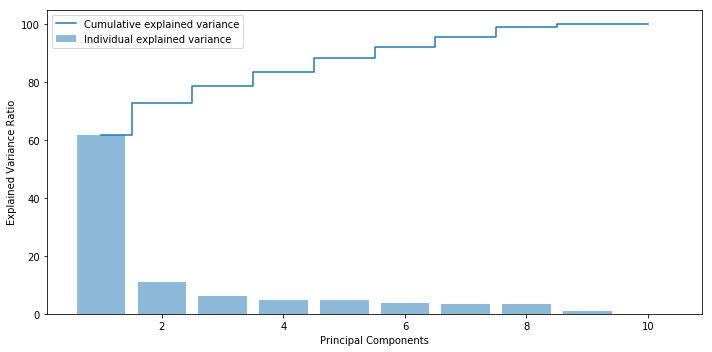

In [320]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q10 Find correlation between components and features

In [318]:
bcancer_comp = pd.DataFrame(pca.components_,columns = list(bcancer))

ValueError: Shape of passed values is (3, 10), indices imply (3, 11)

In [317]:
sns.heatmap(bcancer_comp)

NameError: name 'bcancer_comp' is not defined

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [349]:
jokes = pd.read_csv("jokes.csv")
jokes.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [350]:
ratings = jokes.iloc[0:200,1:101]

#print(ratings.info())

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [351]:
ratings = ratings.replace(99.0,0)

In [352]:
ratings.head(5)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [356]:
rate_mean = ratings.agg(['mean'])

In [354]:
rate_mean
.head(5)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
average,0.53005,0.5939,0.23765,-0.701,-0.0379,1.32005,0.1715,-0.0853,0.0167,0.8947,...,0.5626,0.1751,1.15585,0.6379,0.58165,0.41755,0.755,0.0937,0.135,0.5244


In [360]:
rate_mean.describe()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
count,1.00000,1.0000,1.00000,1.000,1.0000,1.00000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.00000,1.0000,1.00000,1.00000,1.000,1.0000,1.000,1.0000
mean,0.53005,0.5939,0.23765,-0.701,-0.0379,1.32005,0.1715,-0.0853,0.0167,0.8947,...,0.5626,0.1751,1.15585,0.6379,0.58165,0.41755,0.755,0.0937,0.135,0.5244
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.53005,0.5939,0.23765,-0.701,-0.0379,1.32005,0.1715,-0.0853,0.0167,0.8947,...,0.5626,0.1751,1.15585,0.6379,0.58165,0.41755,0.755,0.0937,0.135,0.5244
25%,0.53005,0.5939,0.23765,-0.701,-0.0379,1.32005,0.1715,-0.0853,0.0167,0.8947,...,0.5626,0.1751,1.15585,0.6379,0.58165,0.41755,0.755,0.0937,0.135,0.5244
50%,0.53005,0.5939,0.23765,-0.701,-0.0379,1.32005,0.1715,-0.0853,0.0167,0.8947,...,0.5626,0.1751,1.15585,0.6379,0.58165,0.41755,0.755,0.0937,0.135,0.5244
75%,0.53005,0.5939,0.23765,-0.701,-0.0379,1.32005,0.1715,-0.0853,0.0167,0.8947,...,0.5626,0.1751,1.15585,0.6379,0.58165,0.41755,0.755,0.0937,0.135,0.5244
max,0.53005,0.5939,0.23765,-0.701,-0.0379,1.32005,0.1715,-0.0853,0.0167,0.8947,...,0.5626,0.1751,1.15585,0.6379,0.58165,0.41755,0.755,0.0937,0.135,0.5244


In [366]:
rate_mean.max(axis=1)

mean    4.0554
dtype: float64

In [367]:
rate_mean

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
mean,0.53005,0.5939,0.23765,-0.701,-0.0379,1.32005,0.1715,-0.0853,0.0167,0.8947,...,0.5626,0.1751,1.15585,0.6379,0.58165,0.41755,0.755,0.0937,0.135,0.5244
